<a href="https://colab.research.google.com/github/bchaithanyasai/PredictLateArrivalsPaper/blob/master/Visualization_for_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

data=pd.read_csv('/content/drive/My Drive/DataSet.csv')

In [3]:
data

,ACTUAL_ELAPSED_TIME,AIR_TIME,ARR_DELAY,ARR_TIME,CANCELLED,CARRIER_DELAY,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_DELAY,DEP_TIME,DEST,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_NAME,DISTANCE,DIVERTED,FLIGHTS,LATE_AIRCRAFT_DELAY,MONTH,NAS_DELAY,OP_CARRIER,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,QUARTER,SECURITY_DELAY,TAXI_IN,TAXI_OUT,Unnamed: 33,Unnamed: 37,WEATHER_DELAY,WHEELS_OFF,WHEELS_ON,YEAR
0,37.0,18.0,-12.0,1720.0,0.0,NaN,1732,1645,47.0,6,7,0.0,-2.0,1643.0,CSG,11150.0,1115005.0,"Columbus, GA",83.0,0.0,1.0,NaN,1,NaN,9E,ATL,10397.0,1039707.0,"Atlanta, GA",1,NaN,2.0,17.0,NaN,NaN,NaN,1700.0,1718.0,2019
1,32.0,19.0,-20.0,1712.0,0.0,NaN,1732,1645,47.0,7,1,0.0,-5.0,1640.0,CSG,11150.0,1115005.0,"Columbus, GA",83.0,0.0,1.0,NaN,1,NaN,9E,ATL,10397.0,1039707.0,"Atlanta, GA",1,NaN,3.0,10.0,NaN,NaN,NaN,1650.0,1709.0,2019
2,39.0,19.0,-13.0,1719.0,0.0,NaN,1732,1645,47.0,8,2,0.0,-5.0,1640.0,CSG,11150.0,1115005.0,"Columbus, GA",83.0,0.0,1.0,NaN,1,NaN,9E,ATL,10397.0,1039707.0,"Atlanta, GA",1,NaN,2.0,18.0,NaN,NaN,NaN,1658.0,1717.0,2019
3,37.0,19.0,-15.0,1717.0,0.0,NaN,1732,1645,47.0,9,3,0.0,-5.0,1640.0,CSG,11150.0,1115005.0,"Columbus, GA",83.0,0.0,1.0,NaN,1,NaN,9E,ATL,10397.0,1039707.0,"Atlanta, GA",1,NaN,4.0,14.0,NaN,NaN,NaN,1654.0,1713.0,2019
4,41.0,21.0,-11.0,1721.0,0.0,NaN,1732,1645,47.0,10,4,0.0,-5.0,1640.0,CSG,11150.0,1115005.0,"Columbus, GA",83.0,0.0,1.0,NaN,1,NaN,9E,ATL,10397.0,1039707.0,"Atlanta, GA",1,NaN,4.0,16.0,NaN,NaN,NaN,1656.0,1717.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422600,151.0,126.0,52.0,1731.0,0.0,52.0,1639,1356,163.0,31,2,1.0,64.0,1500.0,SWF,NaN,NaN,"Newburgh/Poughkeepsie, NY",989.0,0.0,1.0,0.0,12,0.0,B6,MCO,NaN,NaN,"Orlando, FL",4,0.0,5.0,20.0,NaN,NaN,0.0,1520.0,1726.0,2019
7422601,79.0,57.0,-17.0,1533.0,0.0,NaN,1550,1420,90.0,31,2,0.0,-6.0,1414.0,BOS,NaN,NaN,"Boston, MA",399.0,0.0,1.0,NaN,12,NaN,B6,DCA,NaN,NaN,"Washington, DC",4,NaN,7.0,15.0,NaN,NaN,NaN,1429.0,1526.0,2019
7422602,59.0,42.0,-34.0,751.0,0.0,NaN,825,700,85.0,31,2,0.0,-8.0,652.0,BOS,NaN,NaN,"Boston, MA",280.0,0.0,1.0,NaN,12,NaN,B6,PHL,NaN,NaN,"Philadelphia, PA",4,NaN,5.0,12.0,NaN,NaN,NaN,704.0,746.0,2019
7422603,216.0,203.0,-27.0,1248.0,0.0,NaN,1315,813,242.0,31,2,0.0,-1.0,812.0,SJU,NaN,NaN,"San Juan, PR",1674.0,0.0,1.0,NaN,12,NaN,B6,BOS,NaN,NaN,"Boston, MA",4,NaN,3.0,10.0,NaN,NaN,NaN,822.0,1245.0,2019


In [6]:
airline_counts=dict(data.groupby('OP_CARRIER').size())
airline_counts

{'9E': 256106,
 'AA': 945888,
 'AS': 264721,
 'B6': 297438,
 'DL': 991520,
 'EV': 134517,
 'F9': 135624,
 'G4': 108374,
 'HA': 83861,
 'MQ': 326641,
 'NK': 204830,
 'OH': 289101,
 'OO': 835214,
 'UA': 625793,
 'WN': 1366762,
 'YV': 227905,
 'YX': 328310}

In [7]:
sum(airline_counts.values())

7422605

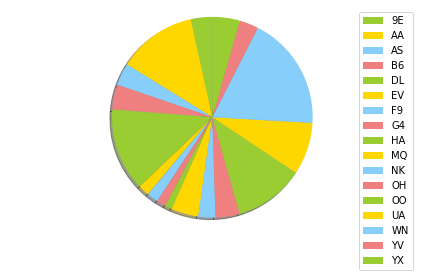

In [8]:
import matplotlib.pyplot as plt

labels = airline_counts.keys()
sizes = airline_counts.values()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [0]:
import operator
ordered=dict(sorted(airline_counts.items(), key=operator.itemgetter(1),reverse=True))

In [10]:
len(ordered)

17

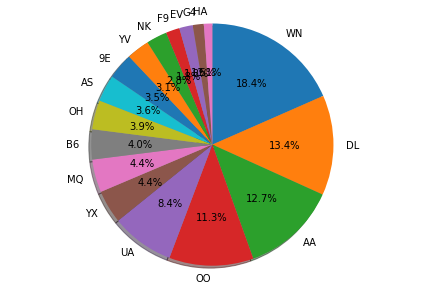

In [11]:
import matplotlib.pyplot as plt

# Data to plot
labels = ordered.keys()
sizes = ordered.values()
# Plot

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

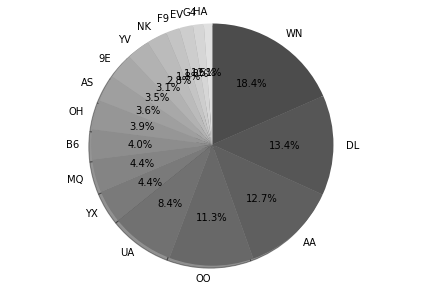

In [12]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.gray(np.linspace(0.3,0.875,len(ordered)))

# Data to plot
labels = ordered.keys()
sizes = ordered.values()
# Plot

plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

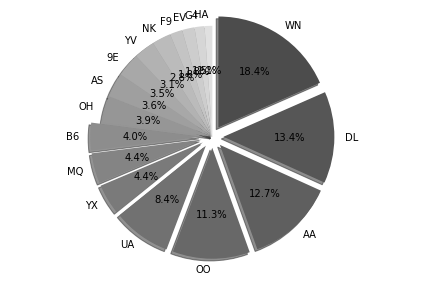

In [13]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.gray(np.linspace(0.3,0.875,len(ordered)))
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0)
# Data to plot
labels = ordered.keys()
sizes = ordered.values()

# Plot

plt.pie(sizes, labels=labels,explode=explode,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [14]:
import numpy as np
from itertools import islice

def indices_to_merge(dic,cut_off_percent):
  sum=0;cumm_per=0;cummulative_percent=[]
  for key in dic.keys():
    sum=sum+dic[key]
  values=list(dic.values())
  percent_of_outcome=(values/sum)*100
  percent_of_outcome=[round(elem,1) for elem in percent_of_outcome]
  print(percent_of_outcome)
  for percent in percent_of_outcome:
    cumm_per=cumm_per+percent
    cummulative_percent.append(cumm_per)
  print(cummulative_percent)
  return [i for i in range(len(cummulative_percent)) if cummulative_percent[i] > cut_off_percent]

def merge_indices(dic,ind):
  sum=0
  values=list(dic.values())
  print(values)
  sel_values=values[ind[0]:]
  for elem in sel_values:
    sum=sum+elem
  print(sum)
  delete_indices(dic,ind)
  dic['other']=sum
  print(dic)

def delete_indices(dic,indices):
  i = 0
  keys_to_delete = []
  for key in dic.keys():
      if i in indices:
          print(key)
          keys_to_delete.append(key)
      i = i + 1

  for key in keys_to_delete:
      if key in dic:
          del dic[key]

merge_indices(ordered,indices_to_merge(ordered,94))

[18.4, 13.4, 12.7, 11.3, 8.4, 4.4, 4.4, 4.0, 3.9, 3.6, 3.5, 3.1, 2.8, 1.8, 1.8, 1.5, 1.1]
[18.4, 31.799999999999997, 44.5, 55.8, 64.2, 68.60000000000001, 73.00000000000001, 77.00000000000001, 80.90000000000002, 84.50000000000001, 88.00000000000001, 91.10000000000001, 93.9, 95.7, 97.5, 99.0, 100.1]
[1366762, 991520, 945888, 835214, 625793, 328310, 326641, 297438, 289101, 264721, 256106, 227905, 204830, 135624, 134517, 108374, 83861]
462376
F9
EV
G4
HA
{'WN': 1366762, 'DL': 991520, 'AA': 945888, 'OO': 835214, 'UA': 625793, 'YX': 328310, 'MQ': 326641, 'B6': 297438, 'OH': 289101, 'AS': 264721, '9E': 256106, 'YV': 227905, 'NK': 204830, 'other': 462376}


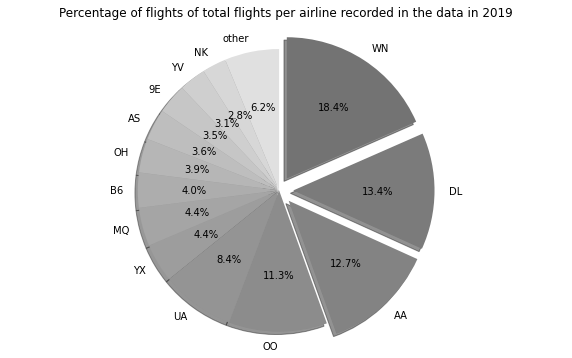

In [21]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.gray(np.linspace(0.45,0.875,len(ordered)))
explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0)
# Data to plot
labels = ordered.keys()
sizes = ordered.values()

# Plot
plt.figure(figsize=(10,6))
plt.title("Percentage of flights of total flights per airline recorded in the data in 2019")
plt.pie(sizes, labels=labels,explode=explode,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.show()